# View attack results data

In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
import sys
import os.path
import sqlite3
import pprint
stdout = sys.stdout
pp = pprint.PrettyPrinter(indent=4)
#pd.set_option('display.max_colwidth', 0)

conn = sqlite3.connect(os.path.join('results','current.db'))
dfRes = pd.read_sql('select * from results',conn)
display(dfRes.head())


,atk_type,atk_sub_type,sys_type,sys_ver,sys_ver_num,atk_date,num_guess,num_right,total_trials,reason
0,simpleListUsers,Select star,reference,0.0.387,38700000,2021-02-10,100,0,100,disallowed
1,simpleListUsers,Select AID column,reference,0.0.387,38700000,2021-02-10,100,100,100,
2,simpleHardDifference,"Simple hard difference attack with lone woman, victim does not have attribute",reference,0.0.387,38700000,2021-02-10,100,0,100,disallowed
3,simpleStrongSuppressDetect,"Simple strong detect suppression attack, one of two known, victim present",reference,0.0.387,38700000,2021-02-10,0,0,100,
4,justTesting,Just testing a new conditionsSql,reference,0.0.387,38700000,2021-02-10,100,0,100,disallowed


### Let's look at the number of attacks per attack version

<AxesSubplot:xlabel='sys_ver,sys_type'>

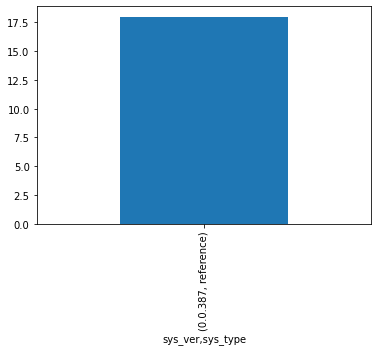

In [82]:
sys_gb = dfRes.groupby(['sys_ver','sys_type'])
s = sys_gb['atk_sub_type'].nunique()
s.plot.bar()

### Let's see how many different attack versions there are

### Let's get the most recent results, and see which attacks have some success

In [83]:
max_ref = dfRes['sys_ver_num'].max()
dfLatest = dfRes.loc[dfRes['sys_ver_num'] == max_ref]
# These are the results where at least one guess was made
dfWithGuess = dfLatest.loc[dfLatest['num_guess'] > 0]
# Add a column which is the confidence score
dfWithGuess['confidence'] = dfWithGuess.apply(lambda row: row.num_right / row.num_guess, axis=1)
dfConfidence = dfWithGuess.loc[dfWithGuess['confidence'] > 0]
for subType in list(dfConfidence['atk_sub_type']):
    print(subType)

Select AID column
First derivitive difference attack with single NAND, victim does not have attribute


In [84]:
display(dfConfidence[['atk_sub_type','confidence','num_guess']])

,atk_sub_type,confidence,num_guess
1,Select AID column,1.0,100
17,"First derivitive difference attack with single NAND, victim does not have attribute",1.0,100
